### Lasso Regularization technique used in feature selection  , Jin features ka use nhi ye unhy exactly zero kr deti

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df  = pd.read_csv("diabetes.csv")

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


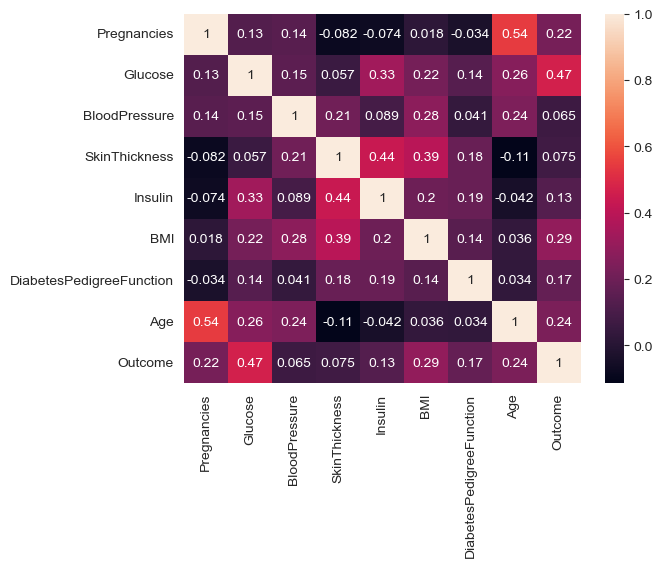

In [5]:
sns.heatmap(data= df.corr(), annot= True)
plt.show()

In [6]:
X  = df.iloc[:, :-1]
Y= df["Outcome"]


In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size= 20 , random_state= 0)


### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)*100

66.90541947396412

In [10]:
lr.coef_

array([ 1.98753096e-02,  5.75733535e-03, -2.37823085e-03,  8.14640379e-05,
       -1.78091347e-04,  1.33679283e-02,  1.53593377e-01,  2.97533866e-03])

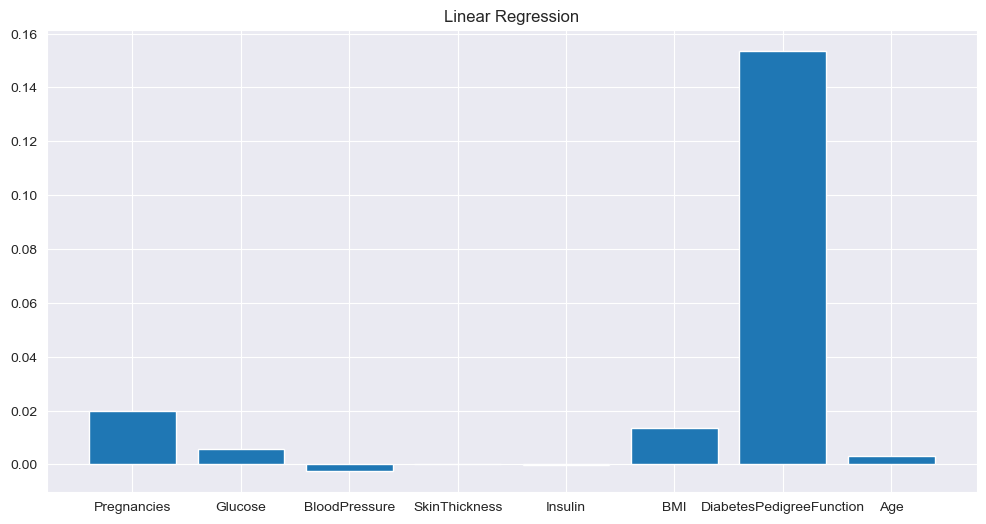

In [16]:
plt.figure(figsize=(12,6))
plt.bar(X.columns, lr.coef_)
plt.title("Linear Regression")
plt.show()

### To check the value of the Error

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [39]:
print(mean_squared_error(Y_test, lr.predict(X_test)))
print(mean_absolute_error(Y_test, lr.predict(X_test)))
# root mean squre is not pre defined so for this use numpy
print(np.sqrt(mean_squared_error(Y_test, lr.predict(X_test))))

0.07529017069673162
0.23799197667419314
0.274390544109544


### Lasso Regression

In [32]:

la = Lasso(alpha= 0.5 ) # Check this at different values like , 0.01, 0.5. 0.10
la.fit(X_train, Y_train)
la.score(X_test, Y_test)*100

65.47255159089389

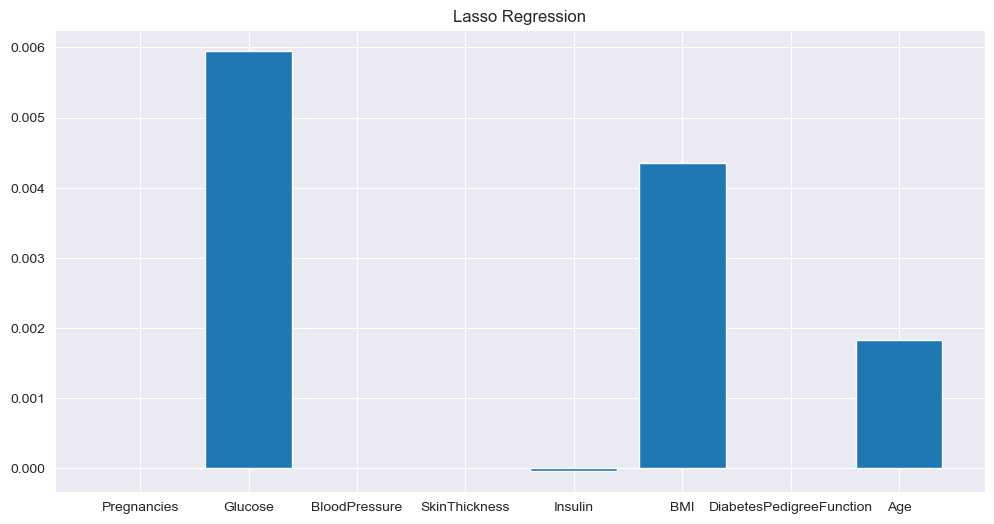

In [33]:
plt.figure(figsize=(12,6))
plt.bar(X.columns, la.coef_)
plt.title("Lasso Regression")
plt.show()

### To check the value of Error


In [40]:
print(mean_squared_error(Y_test, la.predict(X_test)))
print(mean_absolute_error(Y_test, la.predict(X_test)))
# root mean squre is not pre defined so for this use numpy
print(np.sqrt(mean_squared_error(Y_test, la.predict(X_test))))

0.07854994513071638
0.24504093350901252
0.28026763125754706


### Ridge
###### Cofficient ki value ko reduce krta hy ,  Model ko overfitting se bchata 

In [30]:
ra = Ridge(alpha= 0.5)
ra.fit(X_train, Y_train)
ra.score(X_test, Y_test)*100

66.9273727996395

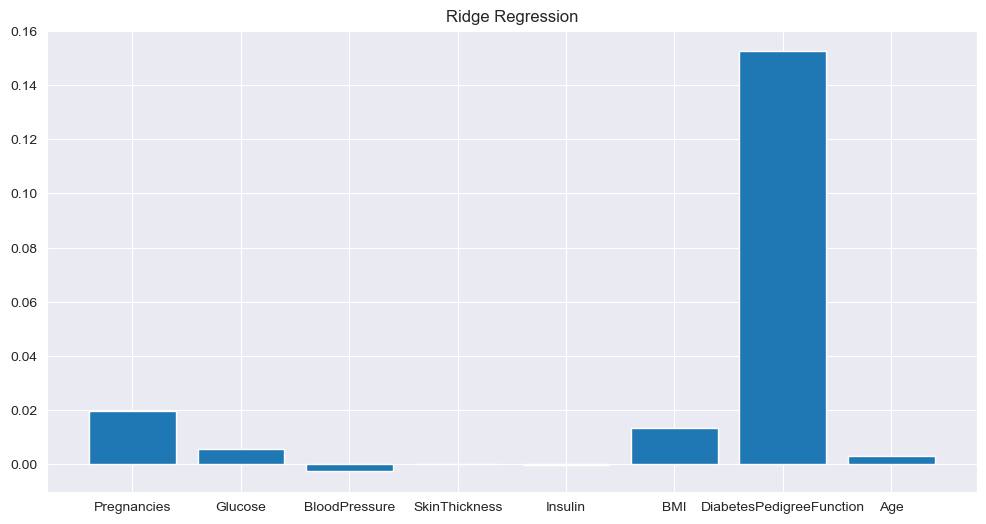

In [31]:
plt.figure(figsize=(12,6))
plt.bar(X.columns, ra.coef_)
plt.title("Ridge Regression")
plt.show()

### Value of Error

In [41]:
print(mean_squared_error(Y_test, ra.predict(X_test)))
print(mean_absolute_error(Y_test, ra.predict(X_test)))
# root mean squre is not pre defined so for this use numpy
print(np.sqrt(mean_squared_error(Y_test, ra.predict(X_test))))

0.07524022688082013
0.23791526298198104
0.27429952038022254


#### Compare all the cofficient values

In [42]:
data = pd.DataFrame({"Columns" : X.columns, "Linear" : la.coef_ , "Lasso" : la.coef_ , "Ridge" : ra.coef_})

In [43]:
data

,Columns,Linear,Lasso,Ridge
0,Pregnancies,0.000000,0.000000,0.019868
1,Glucose,0.005951,0.005951,0.005758
2,BloodPressure,-0.000000,-0.000000,-0.002379
3,SkinThickness,0.000000,0.000000,0.000084
4,Insulin,-0.000041,-0.000041,-0.000178
5,BMI,0.004348,0.004348,0.013371
6,DiabetesPedigreeFunction,0.000000,0.000000,0.152567
7,Age,0.001819,0.001819,0.002978
